<a href="https://colab.research.google.com/github/lilika67/Intro_MLSummative/blob/main/Summative_Intro_to_ml_%5BKayitesi_Liliane%5D_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project name: Crop yield Classifier app**

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib



# The Dataset
> ***Brief Description:***
State the Problem and A short Description of the data

***Problem statement***

Farmers face persistent challenges in predicting crop yields due to limited access to actionable data, reliance on outdated farming practices, and a lack of region-specific technological solutions.

***Description of the data***

The dataset used contains agricultural yield data across various regions, crops, and years. It includes key factors such as rainfall, temperature, and pesticide usage, aiming to analyze their impact on crop yields.

[Source of dataset: Kaggle](https://www.kaggle.com/datasets/patelris/crop-yield-prediction-dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#TO DO: Load Data (Seprate into: Train, Validation and test sets)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:

# Loading agricultural dataset

path = "/content/drive/My Drive/data/cropyield_df.csv"
data = pd.read_csv(path)
#df = pd.read_csv('cropyield_df.csv')

In [ ]:
data.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


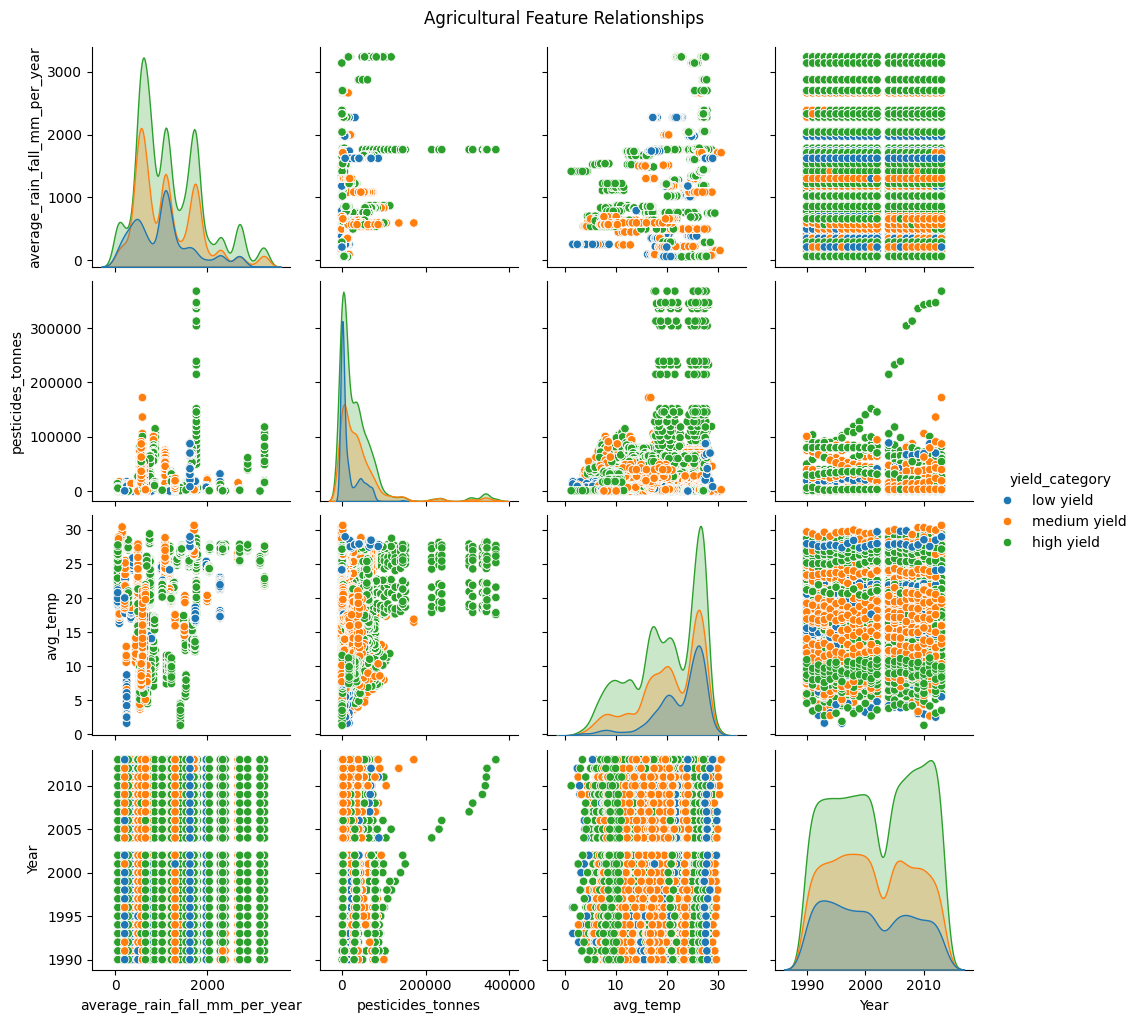

In [ ]:
# Creating cropyield categories
bins = [0, 15000, 35000, float('inf')]
labels = ['low yield', 'medium yield', 'high yield']
data['yield_category'] = pd.cut(data['hg/ha_yield'], bins=bins, labels=labels)

# Selecting agricultural-relevant features
features = [

    'average_rain_fall_mm_per_year',
    'pesticides_tonnes',
    'avg_temp',
    'Year'
]
target = 'yield_category'

# Visualizing feature relationships
sns.pairplot(data[features + [target]], hue=target)
plt.suptitle('Agricultural Feature Relationships', y=1.02)
plt.show()

# Encoding and spliting data
le = LabelEncoder()
y = le.fit_transform(data[target])
X = data[features].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



#SECTION 1: Model Architecture:




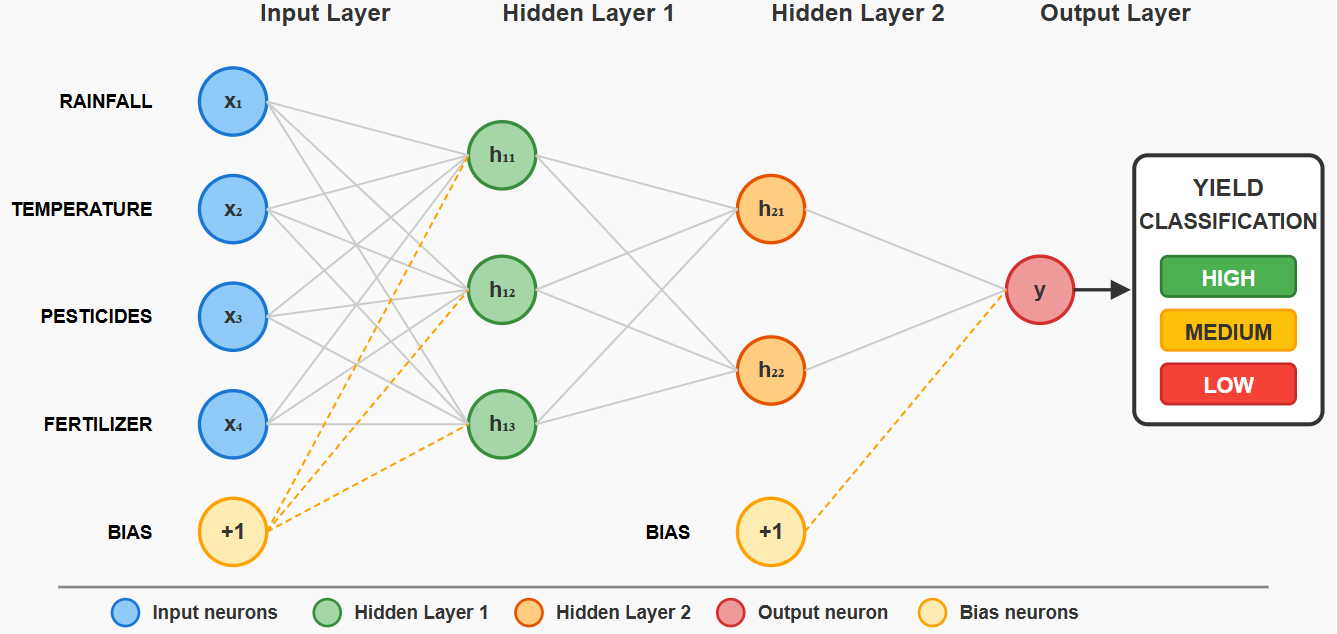




#Task: Define a function that creates models without and With specified Optimization techniques


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

def agriculture_model(
    input_dim,
    num_classes=3,
    optimizer='adam',
    regularizer=None,
    dropout_rate=0.0,
    learning_rate=0.001,
    hidden_layers=[64, 32, 16],
    early_stop_patience=10
):
    """Creating customizable DL model for crop yield prediction"""
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu',
                   input_shape=(input_dim,),
                   kernel_regularizer=get_regularizer(regularizer)))

    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu',
                       kernel_regularizer=get_regularizer(regularizer)))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))

    model.add(Dense(num_classes, activation='softmax'))

    optimizer_obj = get_optimizer(optimizer, learning_rate)
    model.compile(optimizer=optimizer_obj,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    callbacks = [EarlyStopping(patience=early_stop_patience,
                              monitor='val_loss',
                              restore_best_weights=True)]

    return model, callbacks

def get_regularizer(reg_type):
    if reg_type == 'l1': return l1(0.01)
    if reg_type == 'l2': return l2(0.01)
    if reg_type == 'l1_l2': return l1_l2(0.01, 0.01)
    return None

def get_optimizer(name, lr):
    optimizers = {
        'adam': Adam(learning_rate=lr),
        'nadam': Nadam(learning_rate=lr),
        'rmsprop': RMSprop(learning_rate=lr)
    }
    return optimizers.get(name.lower(), Adam(learning_rate=lr))

In [ ]:
# model_1
model_1, cb_1 = agriculture_model(  #cb_1 is callback
    input_dim=len(features),
    optimizer='adam',
    regularizer=None,
    dropout_rate=0.3,
    learning_rate=0.001,
   hidden_layers=[128, 64, 32, 16]
)

# Saving best model during training
best_model_checkpoint = ModelCheckpoint(
    'agriculture_yield_bestmodel.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,

)

# Training the model
history_1 = model_1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[best_model_checkpoint, cb_1],
    verbose=0
)

# Saving preprocessing assets
joblib.dump(scaler, '/content/sample_data/saved_models/agriculture_scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(features, 'feature_names.pkl')



Epoch 1: val_accuracy improved from -inf to 0.53451, saving model to agriculture_yield_bestmodel.keras

Epoch 2: val_accuracy did not improve from 0.53451

Epoch 3: val_accuracy did not improve from 0.53451

Epoch 4: val_accuracy did not improve from 0.53451

Epoch 5: val_accuracy did not improve from 0.53451

Epoch 6: val_accuracy did not improve from 0.53451

Epoch 7: val_accuracy did not improve from 0.53451

Epoch 8: val_accuracy did not improve from 0.53451

Epoch 9: val_accuracy did not improve from 0.53451

Epoch 10: val_accuracy did not improve from 0.53451

Epoch 11: val_accuracy did not improve from 0.53451

Epoch 12: val_accuracy did not improve from 0.53451

Epoch 13: val_accuracy did not improve from 0.53451

Epoch 14: val_accuracy did not improve from 0.53451

Epoch 15: val_accuracy did not improve from 0.53451

Epoch 16: val_accuracy did not improve from 0.53451

Epoch 17: val_accuracy did not improve from 0.53451

Epoch 18: val_accuracy improved from 0.53451 to 0.53938

['feature_names.pkl']

In [ ]:
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.regularizers import l2

# Define the model function
def agriculture_model(input_dim, optimizer, regularizer, dropout_rate, learning_rate, hidden_layers):
    model = Sequential()

    # Input Layer
    model.add(Dense(hidden_layers[0], input_dim=input_dim, activation='relu', kernel_regularizer=l2(regularizer)))
    model.add(Dropout(dropout_rate))

    # Hidden Layers
    for units in hidden_layers[1:]:
        model.add(Dense(units, activation='relu', kernel_regularizer=l2(regularizer)))
        model.add(Dropout(dropout_rate))

    # Output Layer (Binary Classification)
    model.add(Dense(1, activation='sigmoid'))

    # Compile Model
    opt = Nadam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    return model

# Model 2: L2 Regularization + Dropout
model_2 = agriculture_model(
    input_dim=len(features),
    optimizer='nadam',
    regularizer=0.01,  # L2 Regularization factor
    dropout_rate=0.3,
    learning_rate=0.0005,
    hidden_layers=[128, 64, 32, 16]
)

# Train Model 2
history_2 = model_2.fit(X_train, y_train,
                         validation_data=(X_val, y_val),
                         epochs=50,
                         batch_size=32,
                         verbose=1)

# Predictions
y_pred = model_2.predict(X_val)
y_pred_labels = (y_pred > 0.5).astype(int)

# Calculate F1-score
f1 = f1_score(y_val, y_pred_labels, average='weighted')

print(f"F1-score for Model 2: {f1}")


Epoch 1/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1855 - loss: 1.5563 - val_accuracy: 0.1606 - val_loss: 0.7174
Epoch 2/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1732 - loss: 0.6762 - val_accuracy: 0.1606 - val_loss: 0.5772
Epoch 3/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1669 - loss: 0.5725 - val_accuracy: 0.1606 - val_loss: 0.5513
Epoch 4/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1661 - loss: 0.5601 - val_accuracy: 0.1606 - val_loss: 0.5437
Epoch 5/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1665 - loss: 0.5572 - val_accuracy: 0.1606 - val_loss: 0.5404
Epoch 6/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1672 - loss: 0.5461 - val_accuracy: 0.1606 - val_loss: 0.5401
Epoch 7/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1703 - loss: 0.5338 - val_accuracy: 0.1606 - val_loss: 0.5375
Epoch 8/50
636/636 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.1708 - loss: 0.5268 - val_accuracy: 0.

In [ ]:
# Saving model2
model_2.save('/content/sample_data/saved_models/agriculture_yield_model2.keras')



In [ ]:
model_3, cb_3 = agriculture_model(
    input_dim=len(features),
    optimizer='rmsprop',
    regularizer='l1_l2',
    dropout_rate=0.2,
    learning_rate=0.01,  # High learning rate
    hidden_layers=[128, 64, 32],
    early_stop_patience=8
)
history_3 = model_3.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        callbacks=cb_3,
                        verbose=0)
# Saving model3
model_3.save('agriculture_yield_model3.keras')



ValueError: Invalid value for argument l2: expected a non-negative float.Received: l2=l1

In [ ]:
#  Model 4 - Custom Architecture
# ----------------------------
model_4, cb_4 = agriculture_model(
    input_dim=len(features),
    optimizer='nadam',
    regularizer='l2',
    dropout_rate=0.4,
    learning_rate=0.0001,
    hidden_layers=[128, 64, 32, 16, 8],  # Deeper architecture
    early_stop_patience=12
)
history_4 = model_4.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=150,
                        callbacks=cb_4,
                        verbose=0)
# Saving model4
model_4.save('saved_models/agriculture_yield_model4.keras')



In [ ]:
model_5, cb_5 = agriculture_model(
    input_dim=len(features),
    optimizer='adam',
    regularizer='l1',
    dropout_rate=0.5,
    learning_rate=0.005,
    hidden_layers=[256, 128, 64, 32],  # Wide and deep
    early_stop_patience=5
)
history_5 = model_5.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=200,
                        callbacks=cb_5,
                        verbose=0)
# Saving model5
model_5.save('saved_models/agriculture_yield_model5.keras')



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Tuning hyperparameters
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.9,
    n_estimators=200,
    reg_alpha=0.5,  # L1 regularization
    reg_lambda=0.5  # L2 regularization
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred):.3f}")

XGBoost Accuracy: 0.531


# Task: Print out the Final Model Accuracy and plot the Loss curve

In [ ]:

# Final Model Evaluation


# assigning  model_histories and display_names
model_histories = [
    history_1,  # Baseline
    history_2,  # L2+Dropout
    history_3,  # L1/L2+High LR
    history_4,  # Deep Architecture
    history_5   # Experimental
]

display_names = [
    "Baseline (Adam)",
    "L2+Dropout (Nadam)",
    "L1/L2+High LR (RMSprop)",
    "Deep Architecture (Nadam)",
    "Experimental (Adam)"
]

def print_final_metrics(history):
    """Printing final training/validation metrics"""
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

def plot_loss_curves(histories, model_names):
    """Plot loss curves for all models"""
    plt.figure(figsize=(10, 6))
    for history, name in zip(histories, model_names):
        plt.plot(history.history['val_loss'], label=name)

    plt.title('Agricultural Yield Prediction Loss Curves')
    plt.ylabel('Validation Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

# For all models
print("=== Model Performance Comparison ===")
for i, (hist, name) in enumerate(zip(model_histories, display_names)):
    print(f"\nModel {i+1}: {name}")
    print_final_metrics(hist)
    print("-------------------------")

# Ploting combined loss curves
plot_loss_curves(model_histories, display_names)



NameError: name 'history_3' is not defined

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5120 - loss: 0.9799 - val_accuracy: 0.5350 - val_loss: 0.9289
Epoch 2/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5222 - loss: 0.9451 - val_accuracy: 0.5345 - val_loss: 0.9222
Epoch 3/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5211 - loss: 0.9396 - val_accuracy: 0.5403 - val_loss: 0.9209
Epoch 4/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5300 - loss: 0.9301 - val_accuracy: 0.5429 - val_loss: 0.9150
Epoch 5/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5292 - loss: 0.9314 - val_accuracy: 0.5438 - val_loss: 0.9143
Epoch 6/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5270 - loss: 0.9240 - val_accuracy: 0.5398 - val_loss: 0.9127
Epoch 7/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5278 - loss: 0.9259 - val_accuracy: 0.5420 - val_loss: 0.9150
Epoch 8/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5289 - loss: 0.9215 - val_accuracy: 0.5473

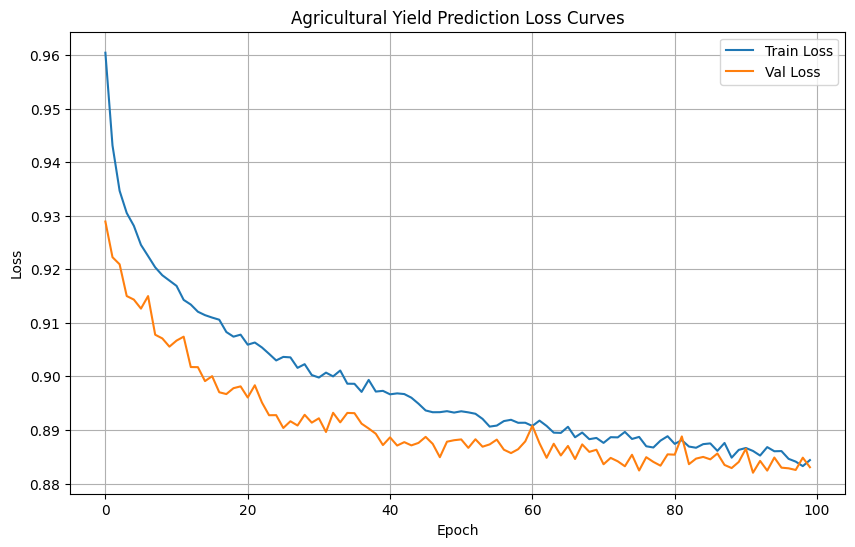

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Confusion Matrix ===


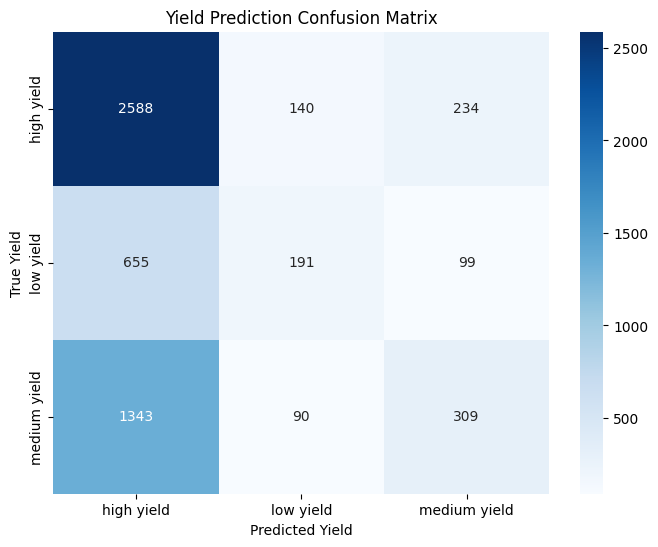


=== Classification Report ===
              precision    recall  f1-score   support

  high yield      0.564     0.874     0.686      2962
   low yield      0.454     0.202     0.280       945
medium yield      0.481     0.177     0.259      1742

    accuracy                          0.547      5649
   macro avg      0.500     0.418     0.408      5649
weighted avg      0.520     0.547     0.486      5649



In [ ]:
# ----------------------------
# Optimization Configuration Cell
# ----------------------------
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

def define_model(optimizer='adam', regularizer=None):
    """Creates model with specified optimization/regularization"""
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer=regularizer, input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=regularizer),
        Dense(3, activation='softmax')
    ])

    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

def loss_curve_plot(history):
    """Plot training/validation loss curves"""
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Agricultural Yield Prediction Loss Curves')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

# ----------------------------
# Model 2: Adam without Regularization
# ----------------------------
model_2 = define_model(optimizer='Adam', regularizer=None)
history_2 = model_2.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        verbose=1)

# Plot loss curves
loss_curve_plot(history_2)

# ----------------------------
# Error Analysis Metrics
# ----------------------------
y_pred = np.argmax(model_2.predict(X_test), axis=1)

print("=== Confusion Matrix ===")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Blues')
plt.title('Yield Prediction Confusion Matrix')
plt.xlabel('Predicted Yield')
plt.ylabel('True Yield')
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred,
                            target_names=le.classes_,
                            digits=3))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5135 - loss: 0.9813 - val_accuracy: 0.5376 - val_loss: 0.9351
Epoch 2/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5286 - loss: 0.9455 - val_accuracy: 0.5381 - val_loss: 0.9274
Epoch 3/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5271 - loss: 0.9450 - val_accuracy: 0.5394 - val_loss: 0.9220
Epoch 4/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5269 - loss: 0.9341 - val_accuracy: 0.5394 - val_loss: 0.9196
Epoch 5/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5261 - loss: 0.9317 - val_accuracy: 0.5429 - val_loss: 0.9179
Epoch 6/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5283 - loss: 0.9229 - val_accuracy: 0.5345 - val_loss: 0.9157
Epoch 7/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5295 - loss: 0.9257 - val_accuracy: 0.5403 - val_loss: 0.9136
Epoch 8/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5277 - loss: 0.9275 - val_accuracy: 0.5416

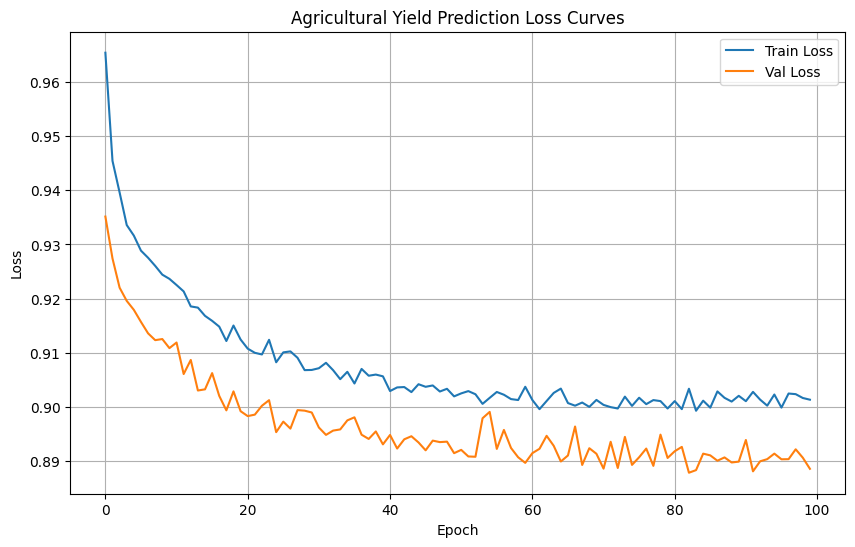

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Confusion Matrix ===


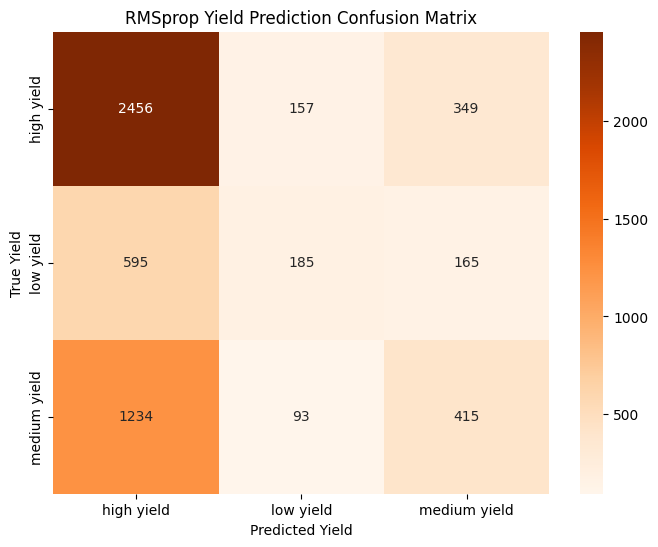


=== Classification Report ===
              precision    recall  f1-score   support

  high yield      0.573     0.829     0.678      2962
   low yield      0.425     0.196     0.268       945
medium yield      0.447     0.238     0.311      1742

    accuracy                          0.541      5649
   macro avg      0.482     0.421     0.419      5649
weighted avg      0.509     0.541     0.496      5649



In [ ]:
# ----------------------------
# Model 3: RMSprop without Regularization
# ----------------------------
model_3 = define_model(optimizer='RMSprop', regularizer=None)
history_3 = model_3.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        verbose=1)

# Plot loss curves
loss_curve_plot(history_3)


y_pred = np.argmax(model_3.predict(X_test), axis=1)

print("=== Confusion Matrix ===")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Oranges')
plt.title('RMSprop Yield Prediction Confusion Matrix')
plt.xlabel('Predicted Yield')
plt.ylabel('True Yield')
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred,
                            target_names=le.classes_,
                            digits=3))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4980 - loss: 1.0028 - val_accuracy: 0.5363 - val_loss: 0.9356
Epoch 2/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5194 - loss: 0.9507 - val_accuracy: 0.5381 - val_loss: 0.9286
Epoch 3/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5275 - loss: 0.9350 - val_accuracy: 0.5354 - val_loss: 0.9226
Epoch 4/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5328 - loss: 0.9253 - val_accuracy: 0.5385 - val_loss: 0.9172
Epoch 5/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5238 - loss: 0.9316 - val_accuracy: 0.5341 - val_loss: 0.9136
Epoch 6/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5305 - loss: 0.9212 - val_accuracy: 0.5398 - val_loss: 0.9125
Epoch 7/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5307 - loss: 0.9244 - val_accuracy: 0.5279 - val_loss: 0.9132
Epoch 8/100
636/636 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5300 - loss: 0.9161 - val_accuracy: 0.5447

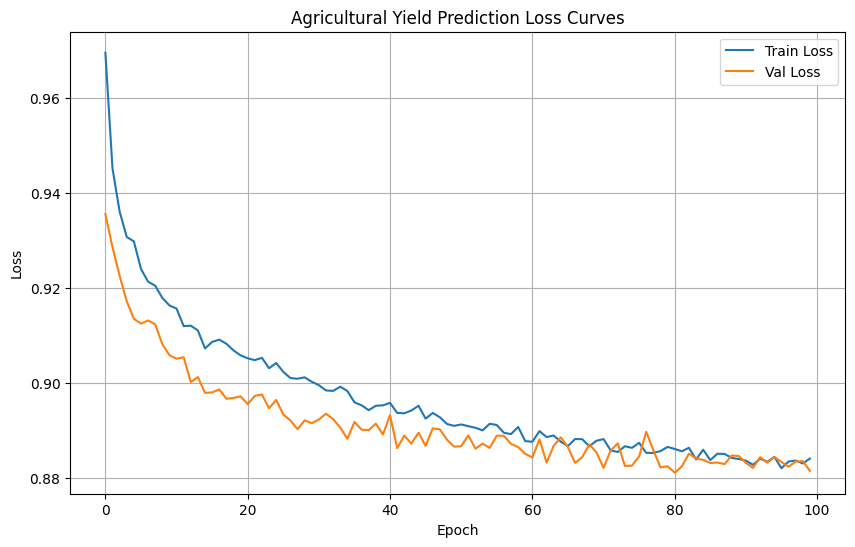

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Confusion Matrix ===


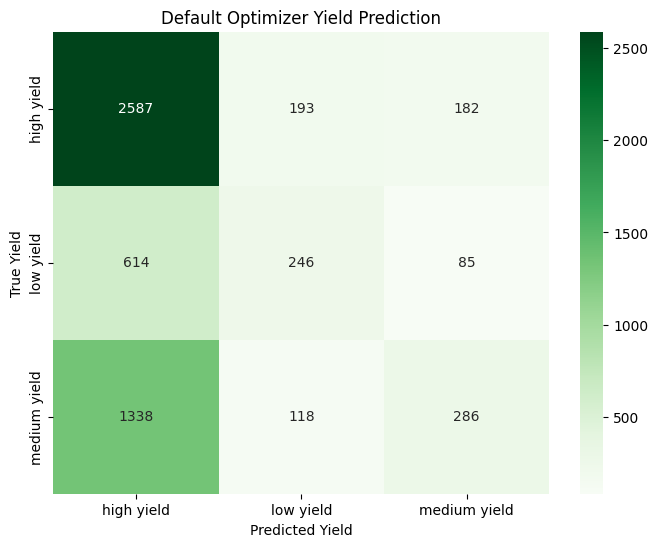


=== Classification Report ===
              precision    recall  f1-score   support

  high yield      0.570     0.873     0.690      2962
   low yield      0.442     0.260     0.328       945
medium yield      0.517     0.164     0.249      1742

    accuracy                          0.552      5649
   macro avg      0.510     0.433     0.422      5649
weighted avg      0.532     0.552     0.493      5649



In [ ]:
# ----------------------------
# Model 4: Default Optimizer (Adam)
# ----------------------------
model_4 = define_model(optimizer='adam', regularizer=None)
history_4 = model_4.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        verbose=1)

# Plot loss curves
loss_curve_plot(history_4)

# ----------------------------
# Error Analysis Metrics
# ----------------------------
y_pred = np.argmax(model_4.predict(X_test), axis=1)

print("=== Confusion Matrix ===")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Greens')
plt.title('Default Optimizer Yield Prediction')
plt.xlabel('Predicted Yield')
plt.ylabel('True Yield')
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred,
                            target_names=le.classes_,
                            digits=3))

#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [ ]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

# Set the correct path for your saved model
model_path = 'saved_models/agriculture_yield_bestmodel.keras'

# Function to preprocess new input data
def preprocess_new_data(raw_data, scaler):
    """Preprocess new agricultural data"""
    processed = scaler.transform(np.array(raw_data).reshape(1, -1))
    return processed

# Function to load the model and make predictions
def make_predictions(input_data):
    """Load the model and make predictions based on new input data"""
    # Load the scaler and model
    scaler = joblib.load('saved_models/agriculture_scaler.pkl')
    le = joblib.load('label_encoder.pkl')
    model = load_model(model_path)

    # Preprocess the new input data
    processed_data = preprocess_new_data(input_data, scaler)

    # Make prediction
    predicted_yield = model.predict(processed_data)

    # Get the predicted category (for classification problems)
    yield_class = np.argmax(predicted_yield, axis=1)

    # Return the predicted category name
    return le.inverse_transform(yield_class)[0]

# input data
new_data = [
    1500,  # Rainfall (mm)
    22.5,  # Temperature (°C)
    3500,   # Pesticides (tonnes)
    420    # Fertilizer usage (kg/ha)
]

# Make prediction
predicted_category = make_predictions(new_data)
print(f"Predicted Yield Category: {predicted_category}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
Predicted Yield Category: high yield


Congratulations!!
